In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
import juanfit
import copy
from scipy import interpolate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.integrate import simps
from scipy.signal import find_peaks
rcParams['axes.linewidth'] = 1.2
import cmcrameri.cm as cmcm

In [3]:
m_p = const.m_p.cgs.value
k_b = const.k_B.cgs.value
c = const.c.cgs.value
rs = const.R_sun.cgs.value

In [4]:
#read dataset
awsom_data_set = scipy.io.readsav('../../save/spectrum/box/box_2063_v2.sav',verbose = True,python_dict=True)

--------------------------------------------------
Date: Thu Nov 18 18:02:08 2021
User: yjzhu
Host: ptolemy.engin.umich.edu
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.7.2
--------------------------------------------------
Successfully read 6 records of which:
 - 1 are of type TIMESTAMP
 - 3 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x [<class 'numpy.ndarray'>]
 - w [<class 'numpy.ndarray'>]
 - param [<class 'numpy.ndarray'>]
--------------------------------------------------


In [5]:
awsom_FeVIII186_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeVIII_186_ctb.sav",
                        python_dict=True)

awsom_FeIX197_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeIX197_ctb.sav",
                        python_dict=True)

awsom_FeX174_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeX174_ctb.sav",
                        python_dict=True)

awsom_FeXI181_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeXI181_ctb.sav",
                        python_dict=True)

awsom_FeXII192_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeXII_192_ctb.sav",
                        python_dict=True)

awsom_FeXIII202_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeXIII202_ctb.sav",
                        python_dict=True)

awsom_FeVIII697_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeVIII697_ctb.sav",
                        python_dict=True)

awsom_FeX1028_ctb_dataset = scipy.io.readsav("../../save/spectrum/ctb/spectrum_2063_FeX1028_ctb.sav",
                        python_dict=True)                        

In [7]:
awsom_FeVIII186_ctb_dataset.keys()

dict_keys(['wvl', 'ctb_func'])

In [6]:
p_e_ratio = 0.83
awsom_x = awsom_data_set['x'][0,0,0,:]
awsom_y = awsom_data_set['x'][1,0,:,0]
awsom_z = awsom_data_set['x'][2,:,0,0]
rho = awsom_data_set['w'][0,:,:,:]
n = rho/m_p
#n = np.nan_to_num(n,nan=0)
ux = awsom_data_set['w'][1,:,:,:]
uy = awsom_data_set['w'][2,:,:,:]
uz = awsom_data_set['w'][3,:,:,:]
bx = awsom_data_set['w'][4,:,:,:]
by = awsom_data_set['w'][5,:,:,:]
bz = awsom_data_set['w'][6,:,:,:]
I01 = awsom_data_set['w'][7,:,:,:]
I02 = awsom_data_set['w'][8,:,:,:]
p = awsom_data_set['w'][9,:,:,:]
t = p/n/k_b
#t = np.nan_to_num(t,nan=1e3)
p_e = awsom_data_set['w'][10,:,:,:]
t_e = p_e/n/k_b
t_e = np.nan_to_num(t_e,nan=1e3)
n = np.nan_to_num(n,nan=1)
n = n + 1
b_tot = np.sqrt(np.square(bx) + np.square(by) + np.square(bz))
u_tot = np.sqrt(np.square(ux) + np.square(uy) + np.square(uz))
bx_rot = np.zeros_like(bx)
by_rot = np.zeros_like(by)
bz_rot = np.zeros_like(bz)
ux_rot = np.zeros_like(ux)
uy_rot = np.zeros_like(uy)
uz_rot = np.zeros_like(uz)

rot_DD = np.resize(awsom_data_set["param"],(3,3))
for ii in range(ux.shape[0]):
    for jj in range(ux.shape[1]):
        for kk in range(ux.shape[2]):
            bx_rot[ii,jj,kk],by_rot[ii,jj,kk],bz_rot[ii,jj,kk] = np.matmul([bx[ii,jj,kk],by[ii,jj,kk],bz[ii,jj,kk]],rot_DD.T)
            ux_rot[ii,jj,kk],uy_rot[ii,jj,kk],uz_rot[ii,jj,kk] = np.matmul([ux[ii,jj,kk],uy[ii,jj,kk],uz[ii,jj,kk]],rot_DD.T)

ctb_FeVIII_186 = awsom_FeVIII186_ctb_dataset["ctb_func"]
ctb_FeIX_197 = awsom_FeIX197_ctb_dataset["ctb_func"]
ctb_FeX_174 = awsom_FeX174_ctb_dataset["ctb_func"]
ctb_FeXI_181 = awsom_FeXI181_ctb_dataset["ctb_func"]
ctb_FeXII_192 = awsom_FeXII192_ctb_dataset["ctb_func"]
ctb_FeXIII_202 = awsom_FeXIII202_ctb_dataset["ctb_func"]
ctb_FeVIII_697 = awsom_FeVIII697_ctb_dataset["ctb_func"]
ctb_FeX_1028 = awsom_FeX1028_ctb_dataset["ctb_func"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: divide by zero encountered in log10


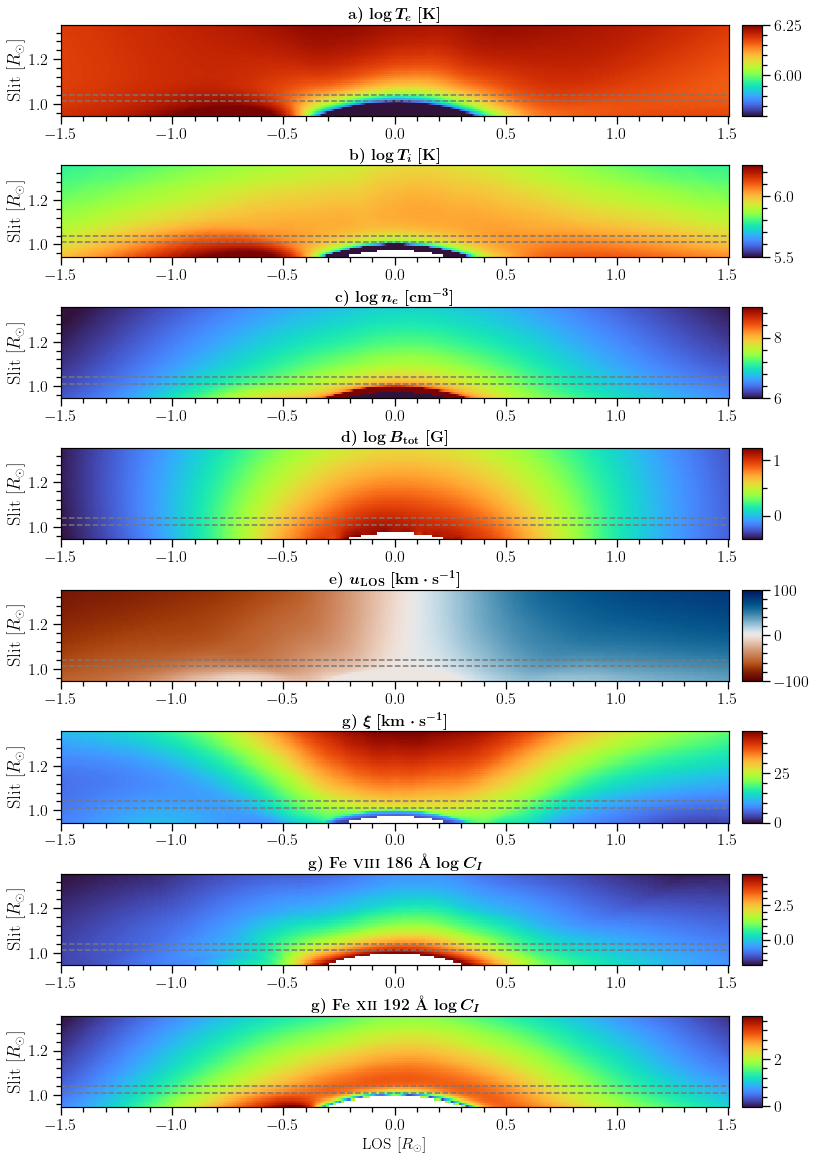

In [7]:
fig, axes = plt.subplots(8,1,figsize=(12,16),constrained_layout=True)
im = axes[0].pcolormesh(awsom_x,awsom_z,np.log10(t_e[:,0,:]),rasterized=True,cmap="turbo",
                        shading='auto',vmin=5.8,
                        vmax=6.25)
axes[0].axis('scaled')
axes[0].set_ylabel(r'Slit $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a)} $\boldsymbol{\log T_e\ \mathrm{[K]}}$',fontsize=16)
clb_ax00 = inset_axes(axes[0],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[0].transAxes,
                 borderpad=0)
clb00 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax00)
clb_ax00.yaxis.set_minor_locator(AutoMinorLocator(5))
clb_ax00.yaxis.get_offset_text().set_fontsize(15)
#clb_ax00.set_ylabel(r'log $T_e$',fontsize=16)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.log10(t[:,0,:]),rasterized=True,vmin=5.5,vmax=6.25,cmap="turbo",
                        shading='auto')
axes[1].axis('scaled')
axes[1].set_title(r'\textbf{b)} $\boldsymbol{\log T_i\ \mathrm{[K]}}$',fontsize=16)
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
#axes[1].tick_params(axis="y",labelsize=0)

clb_ax01 = inset_axes(axes[1],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[1].transAxes,
                 borderpad=0)
clb01 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax01)
clb_ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
clb_ax01.yaxis.get_offset_text().set_fontsize(15)
#clb_ax01.set_ylabel(r'log $T_i$',fontsize=16)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.log10(n[:,0,:]/p_e_ratio),vmax=9,vmin=6,rasterized=True,cmap="turbo",
                        shading='auto')
axes[2].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[2].axis('scaled')
axes[2].set_title(r'\textbf{c)} $\boldsymbol{\log n_e\ \mathrm{[cm^{-3}]}}$',fontsize=16)
clb_ax10 = inset_axes(axes[2],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[2].transAxes,
                 borderpad=0)
clb10 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax10)
clb_ax10.yaxis.get_offset_text().set_fontsize(15)
clb_ax10.yaxis.set_minor_locator(AutoMinorLocator(5))
#clb_ax10.set_ylabel(r'log $n$',fontsize=16)

im = axes[3].pcolormesh(awsom_x,awsom_z,np.log10(b_tot[:,0,:]),rasterized=True,cmap="turbo",
                        shading='auto')
axes[3].axis('scaled')
axes[3].set_title(r'\textbf{d)} $\boldsymbol{\log B_{\rm tot}\ \mathrm{[G]}}$',fontsize=16)
axes[3].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
#axes[3].tick_params(axis="y",labelsize=0)

clb_ax11 = inset_axes(axes[3],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[3].transAxes,
                 borderpad=0)
clb11 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3],cax=clb_ax11)
clb_ax11.yaxis.get_offset_text().set_fontsize(15)
clb_ax11.yaxis.set_minor_locator(AutoMinorLocator(2))

im = axes[4].pcolormesh(awsom_x,awsom_z,ux_rot[:,0,:],vmin=-100,vmax=100,cmap=cmcm.vik_r,rasterized=True,
                        shading='auto')
axes[4].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
axes[4].axis('scaled')
axes[4].set_title(r'\textbf{e)} $\boldsymbol{u_{\rm LOS}\ [\mathrm{km\cdot s^{-1}}]}$',fontsize=16)
clb_ax20 = inset_axes(axes[4],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[4].transAxes,
                 borderpad=0)
clb20 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[4],cax=clb_ax20)
clb_ax20.yaxis.get_offset_text().set_fontsize(15)
clb_ax20.yaxis.set_minor_locator(AutoMinorLocator(5))

# im = axes[5].pcolormesh(awsom_x,awsom_z,u_tot[:,0,:],vmin=0,rasterized=True,cmap="turbo")
# axes[5].axis('scaled')
# axes[5].set_title(r'f) $u_{\rm tot}\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
# axes[5].tick_params(labelsize=13)
# axes[5].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# axes[5].tick_params(axis="y",labelsize=0)

# clb_ax21 = inset_axes(axes[5],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[5].transAxes,
#                  borderpad=0)
# clb21 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax21)
# clb_ax21.tick_params(labelsize=13)
# clb_ax21.yaxis.get_offset_text().set_fontsize(15)
# clb_ax21.yaxis.set_minor_locator(AutoMinorLocator(5))

cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
im = axes[5].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap="turbo",
                        shading='auto')
#axes[5].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
#axes[5].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[5].axis('scaled')
axes[5].set_title(r'\textbf{g)} $\boldsymbol{\xi\ [\mathrm{km\cdot s^{-1}}]}$',fontsize=16)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax21 = inset_axes(axes[5],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[5].transAxes,
                 borderpad=0)
clb21 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax21)
clb_ax21.yaxis.get_offset_text().set_fontsize(15)
clb_ax21.yaxis.set_minor_locator(AutoMinorLocator(5))

im = axes[6].pcolormesh(awsom_x,awsom_z,np.log10(ctb_FeVIII_186),rasterized=True,cmap="turbo",
                        shading='auto')
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[6].axis('scaled')
axes[6].set_title(r'\textbf{g) Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=16)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax30 = inset_axes(axes[6],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[6].transAxes,
                 borderpad=0)
clb30 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[6],cax=clb_ax30)
clb_ax30.yaxis.get_offset_text().set_fontsize(15)
clb_ax30.yaxis.set_minor_locator(AutoMinorLocator(5))

im = axes[7].pcolormesh(awsom_x,awsom_z,np.log10(ctb_FeXII_192),rasterized=True,cmap="turbo",
                        shading='auto')
axes[7].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[7].axis('scaled')
axes[7].set_title(r'\textbf{g) Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=16)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax31 = inset_axes(axes[7],width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=axes[7].transAxes,
                 borderpad=0)
clb31 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[7],cax=clb_ax31)
clb_ax31.yaxis.get_offset_text().set_fontsize(15)
clb_ax31.yaxis.set_minor_locator(AutoMinorLocator(5))

# cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
# vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
# im = axes[3,0].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap="turbo")
# axes[3,0].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
# axes[3,0].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
# axes[3,0].axis('scaled')
# axes[3,0].set_title(r'g) $\xi\ [\mathrm{km\cdot s^{-1}}]$',fontsize=13)
# axes[3,0].tick_params(labelsize=13)
# clb_ax30 = inset_axes(axes[3,0],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[3,0].transAxes,
#                  borderpad=0)
# clb30 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3,0],cax=clb_ax30)
# clb_ax30.tick_params(labelsize=13)
# clb_ax30.yaxis.get_offset_text().set_fontsize(15)
# clb_ax30.yaxis.set_minor_locator(AutoMinorLocator(5))
#clb_ax.set_ylabel(r'$\xi\ (\mathrm{km\cdot s^{-1}})$',fontsize=16)

# %store -r ctb_195
# im = axes[3,1].pcolormesh(awsom_x,awsom_z,np.log10(ctb_195),vmin=-5,vmax=2,rasterized=True,cmap="turbo")
# axes[3,1].axis('scaled')
# axes[3,1].set_title(r'h) $\log C_{\rm I,195}$',fontsize=13)
# axes[3,1].set_xlabel(r'LOS $[R_\odot]$',fontsize=13)
# axes[3,1].tick_params(labelsize=13)
# axes[3,1].yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# axes[3,1].tick_params(axis="y",labelsize=0)

# clb_ax31 = inset_axes(axes[3,1],width="3%",height= "100%",loc='lower left',
#                 bbox_to_anchor=(1.02, 0., 1, 1),
#                  bbox_transform=axes[3,1].transAxes,
#                  borderpad=0)
# clb31 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3,1],cax=clb_ax31)
# clb_ax31.tick_params(labelsize=13)
# clb_ax31.yaxis.get_offset_text().set_fontsize(15)
# clb_ax31.yaxis.set_minor_locator(AutoMinorLocator(5))

for ax_ in axes.flatten():
    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

#for ax_ in axes[:-1].flatten(): 
    #ax_.tick_params(axis="x",labelsize=0)
for ax_ in [clb_ax00,clb_ax01,clb_ax10,clb_ax11,clb_ax20,clb_ax21,clb_ax30,clb_ax31]:
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)

#plt.subplots_adjust(bottom = 0.05,left=0.07,top=0.97,right=0.94,hspace=0,wspace=0.15)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10


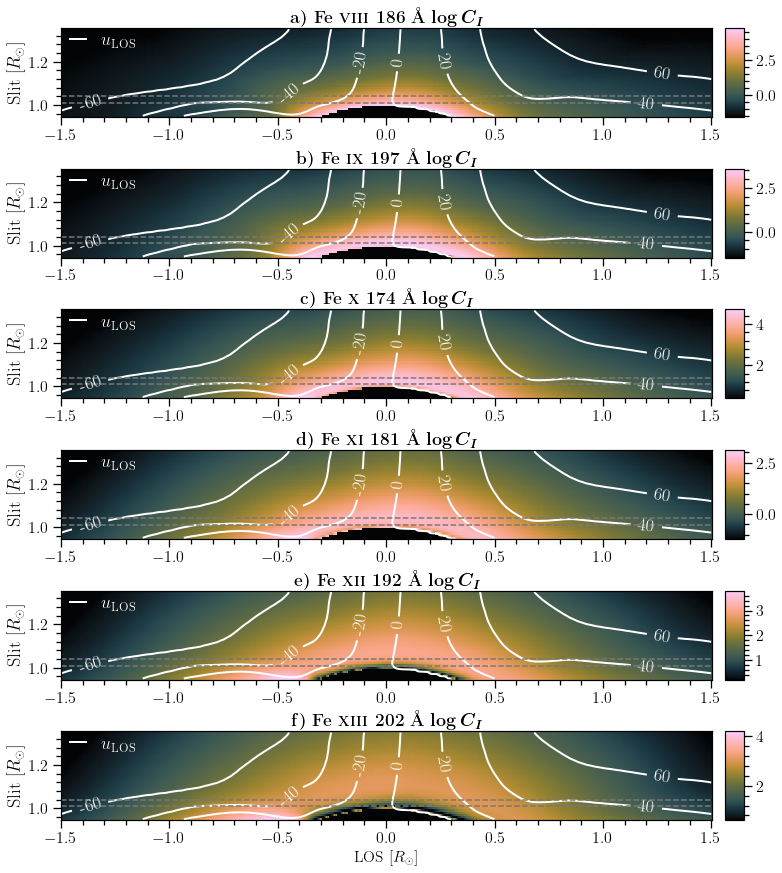

In [12]:
fig, axes = plt.subplots(6,1,figsize=(10,12),constrained_layout=True)

def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []
im = axes[0].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_186),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_186[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a) Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeIX_197),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeIX_197[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[1].set_title(r'\textbf{b) Fe \textsc{ix} 197 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeX_174),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeX_174[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[2].set_title(r'\textbf{c) Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax2 = insert_clb_ax(axes[2])
clb2 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax2)
clb_axes.append(clb_ax2)

im = axes[3].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXI_181),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXI_181[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[3].set_title(r'\textbf{d) Fe \textsc{xi} 181 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax3 = insert_clb_ax(axes[3])
clb3 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3],cax=clb_ax3)
clb_axes.append(clb_ax3)


im = axes[4].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXII_192),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXII_192[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[4].set_title(r'\textbf{e) Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax4 = insert_clb_ax(axes[4])
clb4 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[4],cax=clb_ax4)
clb_axes.append(clb_ax4)

im = axes[5].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXIII_202),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXIII_202[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[5].set_title(r'\textbf{f) Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax5 = insert_clb_ax(axes[5])
clb5 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax5)
clb_axes.append(clb_ax5)
axes[-1].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
for ax_ in axes:
    cs = ax_.contour(awsom_x,awsom_z,ux_rot[:,0,:],colors="white",linewidths=2,linestyles="solid",
    levels=[-60,-40,-20,0,20,40,60])
    ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(-1.4,1.1),(-0.5,1.1),(-0.15,1.2),
                                                            (0.0,1.2),(0.25,1.2),(1.2,1.0),(1.3,1.3)])
    lines = [cs.collections[2]]
    labels = [r"$u_{\rm LOS}$"]
    ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.06,1.03,0.2,0.1),fontsize=18,
                labelcolor="linecolor",handlelength=1)
    
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10


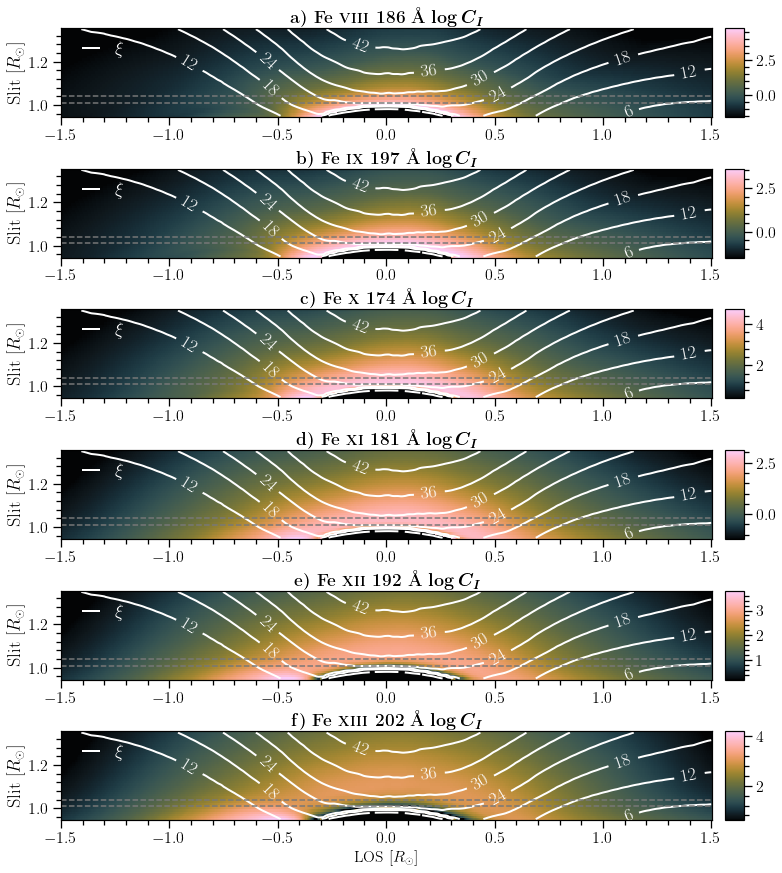

In [10]:
fig, axes = plt.subplots(6,1,figsize=(10,12),constrained_layout=True)

def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []
im = axes[0].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_186),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_186[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a) Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeIX_197),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeIX_197[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[1].set_title(r'\textbf{b) Fe \textsc{ix} 197 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeX_174),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeX_174[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[2].set_title(r'\textbf{c) Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax2 = insert_clb_ax(axes[2])
clb2 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax2)
clb_axes.append(clb_ax2)

im = axes[3].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXI_181),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXI_181[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[3].set_title(r'\textbf{d) Fe \textsc{xi} 181 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax3 = insert_clb_ax(axes[3])
clb3 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3],cax=clb_ax3)
clb_axes.append(clb_ax3)


im = axes[4].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXII_192),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXII_192[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[4].set_title(r'\textbf{e) Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax4 = insert_clb_ax(axes[4])
clb4 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[4],cax=clb_ax4)
clb_axes.append(clb_ax4)

im = axes[5].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXIII_202),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXIII_202[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[5].set_title(r'\textbf{f) Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax5 = insert_clb_ax(axes[5])
clb5 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax5)
clb_axes.append(clb_ax5)
axes[-1].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
for ax_ in axes:
    cs = ax_.contour(awsom_x,awsom_z,vnt[:,0,:]/1e5,colors="white",linewidths=2,linestyles="solid")
    ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(1.15,0.9),(1.4,1.15),(1.1,1.2),
                                                            (0.5,1.07),(0.45,1.1),(0.2,1.15),(-0.1,1.3),
                                                            (-0.9,1.2),(-0.5,1.1),(-0.55,1.2)])
    lines = [cs.collections[3]]
    labels = [r"$\xi$"]
    ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.08,0.93,0.2,0.1),fontsize=18,
                labelcolor="linecolor",handlelength=1)
    
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10


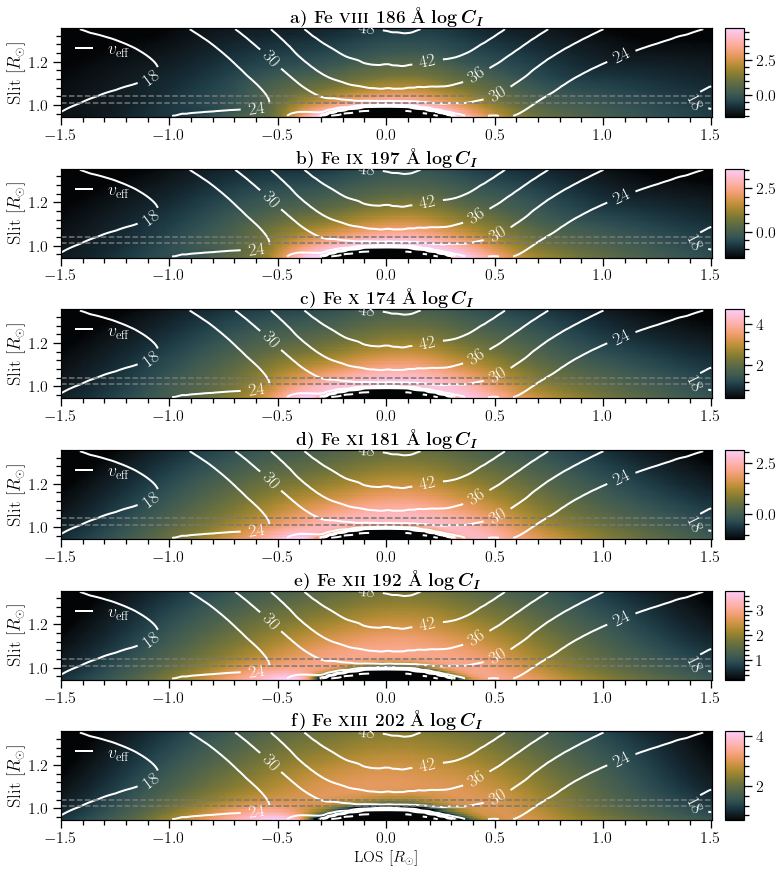

In [11]:
veff = np.sqrt(2*k_b*t[:,0,:]/56/m_p + np.square(vnt[:,0,:]))/1.e5
fig, axes = plt.subplots(6,1,figsize=(10,12),constrained_layout=True)

def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []
im = axes[0].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_186),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_186[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a) Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeIX_197),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeIX_197[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[1].set_title(r'\textbf{b) Fe \textsc{ix} 197 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeX_174),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeX_174[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[2].set_title(r'\textbf{c) Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax2 = insert_clb_ax(axes[2])
clb2 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax2)
clb_axes.append(clb_ax2)

im = axes[3].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXI_181),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXI_181[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[3].set_title(r'\textbf{d) Fe \textsc{xi} 181 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax3 = insert_clb_ax(axes[3])
clb3 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3],cax=clb_ax3)
clb_axes.append(clb_ax3)


im = axes[4].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXII_192),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXII_192[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[4].set_title(r'\textbf{e) Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax4 = insert_clb_ax(axes[4])
clb4 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[4],cax=clb_ax4)
clb_axes.append(clb_ax4)

im = axes[5].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXIII_202),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXIII_202[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[5].set_title(r'\textbf{f) Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax5 = insert_clb_ax(axes[5])
clb5 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[5],cax=clb_ax5)
clb_axes.append(clb_ax5)
axes[-1].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
for ax_ in axes:
    cs = ax_.contour(awsom_x,awsom_z,veff,colors="white",linewidths=2,linestyles="solid")
    ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(1.15,0.9),(1.1,1.2),
                                                            (0.5,1.07),(0.45,1.1),(0.2,1.15),(-0.1,1.3),
                                                            (-0.6,1.0),(-1.1,1.15),(-0.55,1.2)])
    lines = [cs.collections[3]]
    labels = [r"$v_{\rm eff}$"]
    ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.07,0.93,0.2,0.1),fontsize=18,
                labelcolor="linecolor",handlelength=1)
    
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


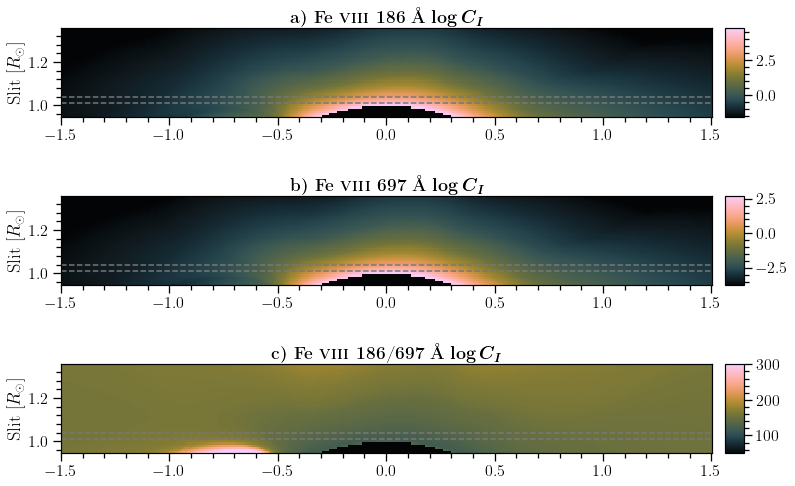

In [25]:
fig, axes = plt.subplots(3,1,figsize=(10,7),constrained_layout=True)

def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []
im = axes[0].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_186),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_186[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a) Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_697),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_697[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[1].set_title(r'\textbf{b) Fe \textsc{viii} 697 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.nan_to_num(ctb_FeVIII_186/ctb_FeVIII_697,nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=50,vmax=300)
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[2].set_title(r'\textbf{c) Fe \textsc{viii} 186/697 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax2 = insert_clb_ax(axes[2])
clb2 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax2)
clb_axes.append(clb_ax2)



for ax_ in axes:
    # cs = ax_.contour(awsom_x,awsom_z,veff,colors="white",linewidths=2,linestyles="solid")
    # ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(1.15,0.9),(1.1,1.2),
    #                                                         (0.5,1.07),(0.45,1.1),(0.2,1.15),(-0.1,1.3),
    #                                                         (-0.6,1.0),(-1.1,1.15),(-0.55,1.2)])
    # lines = [cs.collections[3]]
    # labels = [r"$v_{\rm eff}$"]
    # ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.07,0.93,0.2,0.1),fontsize=18,
    #             labelcolor="linecolor",handlelength=1)
    
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


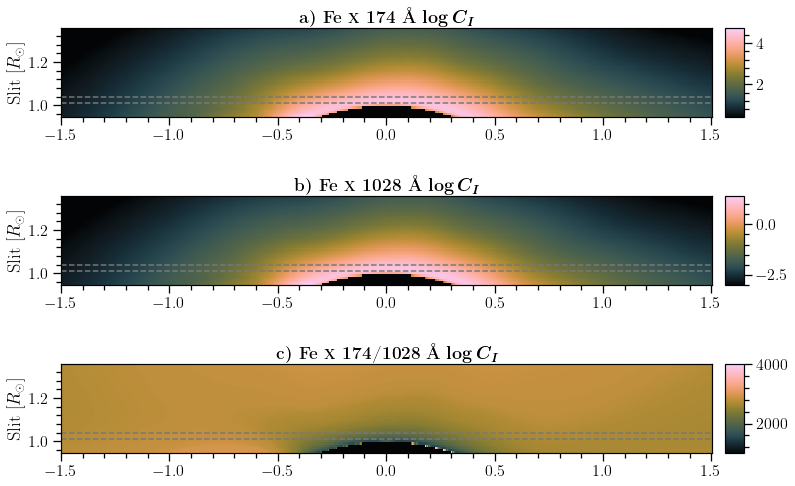

In [30]:
fig, axes = plt.subplots(3,1,figsize=(10,7),constrained_layout=True)

def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []
im = axes[0].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeX_174),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeX_174[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a) Fe \textsc{x} 174 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeX_1028),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeX_1028[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[1].set_title(r'\textbf{b) Fe \textsc{x} 1028 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)

im = axes[2].pcolormesh(awsom_x,awsom_z,np.nan_to_num(ctb_FeX_174/ctb_FeX_1028,nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=1000,vmax=4000)
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[2].set_title(r'\textbf{c) Fe \textsc{x} 174/1028 \mbox{\AA}} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax2 = insert_clb_ax(axes[2])
clb2 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax2)
clb_axes.append(clb_ax2)



for ax_ in axes:
    # cs = ax_.contour(awsom_x,awsom_z,veff,colors="white",linewidths=2,linestyles="solid")
    # ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(1.15,0.9),(1.1,1.2),
    #                                                         (0.5,1.07),(0.45,1.1),(0.2,1.15),(-0.1,1.3),
    #                                                         (-0.6,1.0),(-1.1,1.15),(-0.55,1.2)])
    # lines = [cs.collections[3]]
    # labels = [r"$v_{\rm eff}$"]
    # ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.07,0.93,0.2,0.1),fontsize=18,
    #             labelcolor="linecolor",handlelength=1)
    
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10


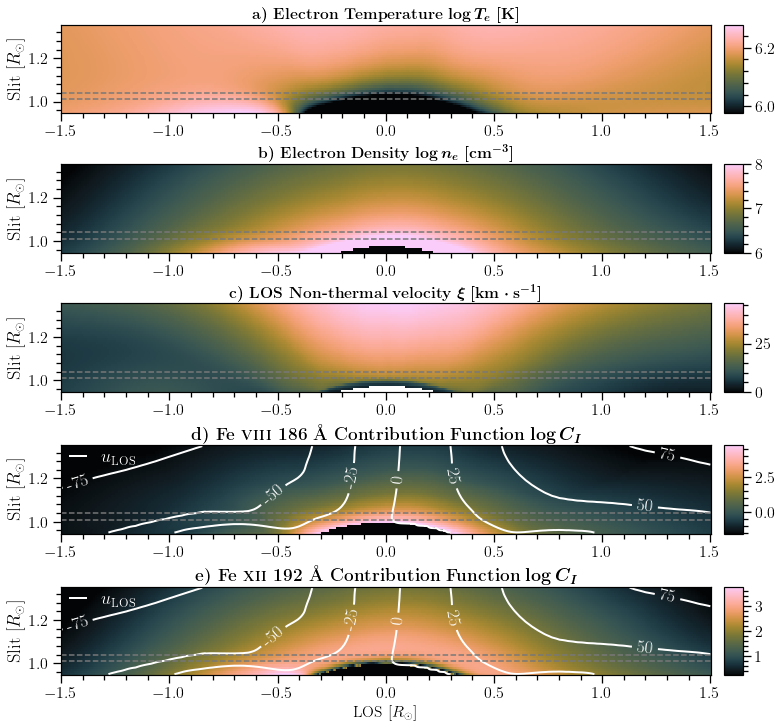

In [43]:
def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []

fig, axes = plt.subplots(5,1,figsize=(12,10),constrained_layout=True)
im = axes[0].pcolormesh(awsom_x,awsom_z,np.log10(t_e[:,0,:]),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.log10(np.percentile(t_e[:,0,:],4)),
                        vmax=np.log10(np.percentile(t_e[:,0,:],99.99)))
axes[0].set_title(r'\textbf{a) Electron Temperature} $\boldsymbol{\log T_e\ \mathrm{[K]}}$',fontsize=16)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)
#clb_ax00.set_ylabel(r'log $T_e$',fontsize=16)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.log10(n[:,0,:]/p_e_ratio),vmax=8,vmin=6,rasterized=True,cmap=cmcm.batlowK,
                        shading='auto')
axes[1].set_title(r'\textbf{b) Electron Density} $\boldsymbol{\log n_e\ \mathrm{[cm^{-3}]}}$',fontsize=16)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)


cos_theta = np.sqrt(1 - np.square(bx_rot)/np.square(b_tot))
vnt = 0.5*np.sqrt((I01 + I02)/m_p/n)*cos_theta
im = axes[2].pcolormesh(awsom_x,awsom_z,vnt[:,0,:]/1e5,vmin=0,rasterized=True,cmap=cmcm.batlowK,
                        shading='auto')
#axes[5].set_ylabel(r'Slit $[R_\odot]$',fontsize=13)
#axes[5].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[2].set_title(r'\textbf{c) LOS Non-thermal velocity} $\boldsymbol{\xi\ [\mathrm{km\cdot s^{-1}}]}$',fontsize=16)
clb_ax2 = insert_clb_ax(axes[2])
clb2 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[2],cax=clb_ax2)
clb_axes.append(clb_ax2)

im = axes[3].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_186),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_186[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[3].set_title(r'\textbf{d) Fe \textsc{viii} 186 \mbox{\AA} Contribution Function} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax3 = insert_clb_ax(axes[3])
clb3 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[3],cax=clb_ax3)
clb_axes.append(clb_ax3)

im = axes[4].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXII_192),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXII_192[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[4].set_title(r'\textbf{e) Fe \textsc{xii} 192 \mbox{\AA} Contribution Function} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax4 = insert_clb_ax(axes[4])
clb4 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[4],cax=clb_ax4)
clb_axes.append(clb_ax4)
axes[-1].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)

for ax_ in axes[-2:]:
    cs = ax_.contour(awsom_x,awsom_z,ux_rot[:,0,:],colors="white",linewidths=2,linestyles="solid")
    ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(-1.4,1.1),(-0.5,1.1),(-0.15,1.2),
                                                            (0.0,1.2),(0.25,1.2),(1.2,1.1),(1.3,1.3)])
    lines = [cs.collections[3]]
    labels = [r"$u_{\rm LOS}$"]
    ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.06,1.03,0.2,0.1),fontsize=18,
                labelcolor="linecolor",handlelength=1)

for ax_ in axes:
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)

plt.savefig(fname="../../figs/ms/AWSoM_LOS_agu.pdf",format="pdf")
#plt.subplots_adjust(bottom = 0.05,left=0.07,top=0.97,right=0.94,hspace=0,wspace=0.15)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


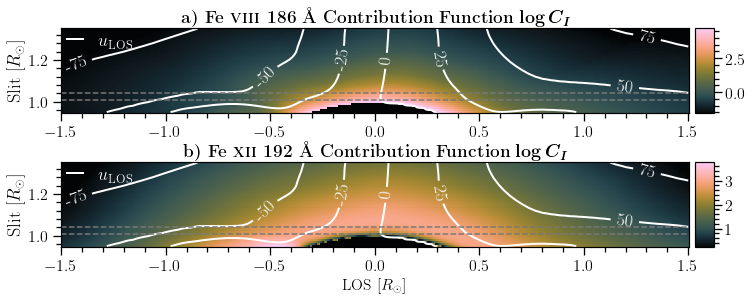

In [57]:
def insert_clb_ax(ax):
    clb_ax = inset_axes(ax,width="3%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.01, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    return clb_ax
clb_axes = []

fig, axes = plt.subplots(2,1,figsize=(10.6,4),constrained_layout=True)

im = axes[0].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeVIII_186),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeVIII_186[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[0].set_title(r'\textbf{a) Fe \textsc{viii} 186 \mbox{\AA} Contribution Function} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax0 = insert_clb_ax(axes[0])
clb0 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[0],cax=clb_ax0)
clb_axes.append(clb_ax0)

im = axes[1].pcolormesh(awsom_x,awsom_z,np.nan_to_num(np.log10(ctb_FeXII_192),nan=-1e10),rasterized=True,cmap=cmcm.batlowK,
                        shading='auto',vmin=np.mean(np.log10(ctb_FeXII_192[-10:,-3:])))
#axes[6].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)
axes[1].set_title(r'\textbf{b) Fe \textsc{xii} 192 \mbox{\AA} Contribution Function} $\boldsymbol{\log C_I}$',fontsize=18)
# axes[5].tick_params(axis="y",labelsize=0)
clb_ax1 = insert_clb_ax(axes[1])
clb1 = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=axes[1],cax=clb_ax1)
clb_axes.append(clb_ax1)
axes[-1].set_xlabel(r'LOS $[R_\odot]$',fontsize=16)

for ax_ in axes[-2:]:
    cs = ax_.contour(awsom_x,awsom_z,ux_rot[:,0,:],colors="white",linewidths=2,linestyles="solid")
    ax_.clabel(cs,inline=1,fontsize=18,fmt="%2d",manual=[(-1.4,1.1),(-0.5,1.1),(-0.15,1.2),
                                                            (0.0,1.2),(0.25,1.2),(1.2,1.1),(1.3,1.3)])
    lines = [cs.collections[3]]
    labels = [r"$u_{\rm LOS}$"]
    ax_.legend(lines,labels,frameon=False,bbox_to_anchor=(-0.06,1.03,0.2,0.1),fontsize=18,
                labelcolor="linecolor",handlelength=1)

for ax_ in axes:
    ax_.axis('scaled')
    ax_.axhline(1.01,color="#787878",lw=1.5,ls="--")
    ax_.axhline(1.04,color="#787878",lw=1.5,ls="--")
    ax_.tick_params(labelsize=16)

    ax_.set_ylabel(r'Slit $[R_\odot]$',fontsize=18)
    ax_.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.3,length=8)
    ax_.tick_params(which="minor",width=1.3,length=5)


for clb_ax_ in clb_axes:
    clb_ax_.yaxis.get_offset_text().set_fontsize(18)
    clb_ax_.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax_.tick_params(labelsize=16)
    clb_ax_.tick_params(which="major",width=1.3,length=8)
    clb_ax_.tick_params(which="minor",width=1.3,length=5)

plt.savefig(fname="../../figs/ms/AWSoM_LOS_agu.pdf",format="pdf")
#plt.subplots_adjust(bottom = 0.05,left=0.07,top=0.97,right=0.94,hspace=0,wspace=0.15)